In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

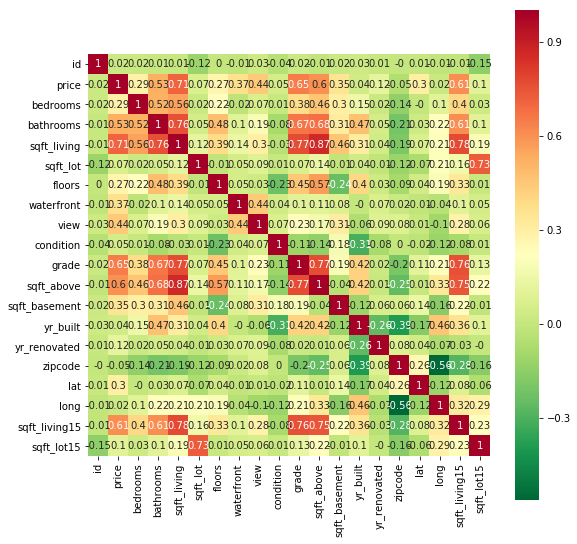

In [ ]:
# import dataset
df = pd.read_csv("https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv")

#print(df)
#mengambil beberapa feature/atribut kedalam list yang berbeda
# fetch features into different lists
correlation = df.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'RdYlGn_r')
plt.show()


In [ ]:
f1 = df['price'].values
f2 = df['bedrooms'].values
f3 = df['bathrooms'].values
f4 = df['sqft_living'].values
f5 = df['sqft_lot'].values
f6 = df['floors'].values
f7 = df['grade'].values
f8 = df['sqft_above'].values
f9 = df['sqft_basement'].values

#data array yang hanya diambil dari data feature/atrbut yang akan digunakan untuk cluster

data = np.array(list(zip(f4,f8)))

print(data[10]) 

[3560 1860]


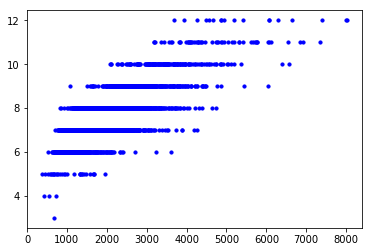

In [ ]:
plt.scatter(f4, f7, s=10, c="b", marker="o", alpha=1)
plt.show()

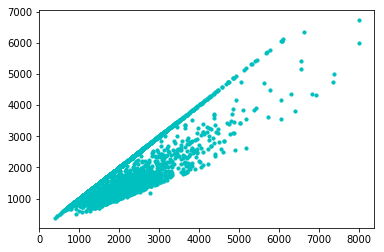

In [ ]:
plt.scatter(f4, f8, s=10, c="c", marker="o", alpha=1)
plt.show()

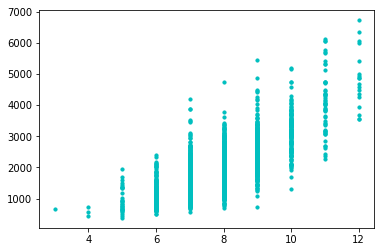

In [ ]:
plt.scatter(f7, f8, s=10, c="c", marker="o", alpha=1)
plt.show()

In [ ]:
def init_centroids(k, data):
    c = []
    
    #membangkitkan nilai 's' dari nilai 'k' secara acak diantara 0 dan # feature/atribut di dataset
    s = np.random.randint(low=1, high=len(data), size=k)
    
    #mengecek jika seluruh anggota dari 's' unik, jika tidak membangkitkan lagi
    while (len(s) != len(set(s))):
        s = np.random.randint(low=1, high=len(data), size=k)
        
    #untuk setiap perulangan, mendapatkan feature/atribut dari dataset dan menambahkan kedalam list
    for i in s:
        c.append(data[i])
    return c

Fungsi ini digunakan untuk inisialisasi nilai centroids. Centroid dipilih secara acak dari dataset.
param k: (int) jumlah centroid
param data: (np-array) berisi atribut dari dataset
return: (list) mengembalikan nilai k yang dipilih secara acak dari centroid dari dataset

In [ ]:
def euc_dist(a, b):
    sum = 0
    for i, j in zip(a, b):
        a = (i - j) * (i - j)
        sum = sum + a
    return math.sqrt(sum)

Fungsi ini digunakan untuk menghitung dan mengembalikan nilai euclidean distance diantara dua vektor input.
param a: (list) vektor a
param b: (list) vektor b
return: (float) mengembalikan nilai euclidean distance diantara dua vektor input

In [ ]:
def cal_dist(centroids, data):
    c_dist = []
    # Untuk setiap centroid 'c', iterasi dijalankan untuk seluruh titik dalam data untuk menghitung jarak dari c
    for i in centroids:
        temp = []
        for j in data:
            temp.append(euc_dist(i, j))
        c_dist.append(temp)
    return c_dist

Fungsi ini digunakan untuk mencari tabel jarak. Untuk setiap titik pada dataset, fungsi ini digunakan untuk menghitung nilai eulidean distance pada setiap centroid dan tabel jarak untuk memperbarui posisi centroid.
param centroids: (list) posisi dari centroid
param data: (np-array) berisi atribut dari dataset
return: (list) jarak dari titik tiap centroid

In [ ]:
def perf_clustering(k, dist_table):
    clusters = []
    for i in range(k):
        clusters.append([])
    # mulai clustering data
    for i in range(len(dist_table[0])):
        d = []
        for j in range(len(dist_table)):
            d.append(dist_table[j][i])
        clusters[d.index(min(d))].append(i)
    return clusters

Fungsi ini digunakan untuk melakukan clustering dan membandingkan jarak dari seluruh centroid dan melakukan cluster pada centroid terdekat.
param k: (int) jumlah centroid
param dist_table: (list) berisi jarak pada setiap centroid
return: (list) mengembalikan nilai yang berisi cluster dan index dari masing-masing anggota

In [ ]:
def update_centroids(centroids, cluster_table, data):
    for i in range(len(centroids)):
        #memperbarui centroid
       
        if (len(cluster_table[i]) > 0):
            temp = []
            
            # copy features dari member cluster ke temp list
            for j in cluster_table[i]:
                temp.append(list(data[j]))
                
            # mengambil nilai rata2 dari features semua member untuk mendapatkan posisi centroid baru
            sum = [0] * len(centroids[i])
            for l in temp:
                sum = [(a + b) for a, b in zip(sum, l)]
            centroids[i] = [p / len(temp) for p in sum]

    return centroids

Fungsi ini digunakan untuk menghitung dan memmperbarui lokasi centroid tiap iterasi. Setelah melakukan clustering, beberapa elemen akan berpindah dari satu cluster ke cluster lain.
param centroid: (list) berisi dari posisi centroid
param cluster_table: (list) berisi cluster dan index dari masing-masing anggota
return: (list) mengembalikan nilai posisi dari centroid yang telah diperbarui

In [ ]:
def check_n_stop(dist_mem, cluster_mem):
    #mengecek jika tabel jarak tidak berubah selama iterasi
    
    c1 = all(x == dist_mem[0] for x in dist_mem)
    #mengecek jika tabel cluster tidak berubah selama iterasi
    
    c2 = all(y == cluster_mem[0] for y in cluster_mem)

    if c1:
        print("Stopping... Distance table has not changed from few iterations")
    elif c2:
        print("Stopping... Cluster table has not changed from few iterations")
    return c1 or c2

Fungsi ini akan mengecek algortima dan berhenti jika memiliki kondisi:
1. nilai euclidean distance/nilai dari tabel jarak tidak berubah setelah dua iterasi atau lebih
2. nilai centroid tidak berubah setelah dua iterasi atau lebih
param dist_table: (list) berisi jarak titik pada tiap centroid
param cluster_table: (list) berisi cluster dan index dari masing-masing anggota
return: True, berhenti jika memiliki kondisi yang tercapai, else False

In [ ]:
def kMeans(k, data, max_iterations):
    
    #Algoritma akan berhenti jika memiliki kriteria yang sesuai
    dist_mem = []
    cluster_mem = []
 
    # Inisialisasi nilai centroid
    centroids = init_centroids(k, data)
    
    #Menghitung tabel jarak
    distance_table = cal_dist(centroids, data)
    
    # Membuat cluster
    cluster_table = perf_clustering(k, distance_table)
    
    #Memperbarui lokasi centroid berdasarkan tabel cluster
    newCentroids = update_centroids(centroids, cluster_table, data)

    #Menambahkan jarak dan tabel cluster kedalam list memory
    
    dist_mem.append(distance_table)
    cluster_mem.append(cluster_table)

    #Ulangi langkah ke 2 sampai berhenti jika memiliki kriteria diatas
    
    for i in range(max_iterations):
        distance_table = cal_dist(newCentroids, data)
        cluster_table = perf_clustering(k, distance_table)
        newCentroids = update_centroids(newCentroids, cluster_table, data)

        #Mengecek jika memiliki kriteria yang sesuai
        dist_mem.append(distance_table)
        cluster_mem.append(cluster_table)
        #Jika jarak/cluster tidak berubah lebih dari 10 iterasi, iterasi akan berhenti, jika tidak maka dilanjutkan
       
        if len(dist_mem) > 10:
            dist_mem.pop(0)
            cluster_mem.pop(0)
            if check_n_stop(dist_mem, cluster_mem):
                print("Stopped at iteration #", i)
                break

    # Display the final results
    #Menampilkan hasil akhir
    #for i in range(len(newCentroids)):
        #print("Centroid #", i, ": ", newCentroids[i])
        #print("Members of the cluster: ")
        #for j in range(len(cluster_table[i])):
            #print(data[cluster_table[i][j]])
    return newCentroids, cluster_table

Langkah-langkah algoritma K-Means :
1. Inisialisasi K buah titik nilai centroid secara acak
2. Mengelompokkan data sehingga terbentuk K buah cluster dengan titik centroid dari setiap cluster merupakan titik centroid yang telah dipilih sebelumnya
3. Memperbarui posisi centroid
4. Mengulangi langkah 2 dan 3 sampai nilai dari titik centroid tidak lagi berubah

param k: (int) jumlah nilai centroid
param data: (np-array) berisi atribut dari dataset
param max_iteration: (int) jumlah iterasi maksimum yang ditentukan
return: none

In [ ]:
center, member = kMeans(3, data, 100)
for i in range(len(center)):
        print("Centroid #", i, ": ", center[i])
        print("Members of the cluster: ")
        for j in range(len(member[i])):
            print(data[member[i][j]])

Stopping... Cluster table has not changed from few iterations
Stopped at iteration # 30
Centroid # 0 :  [2415.4746781115878, 2032.3982832618026]
Members of the cluster: 
[2570 2170]
[1890 1890]
[3560 1860]
[1810 1810]
[2950 1980]
[1890 1890]
[3050 2330]
[2270 2270]
[2450 2450]
[2450 1750]
[2570 2570]
[2320 2320]
[2330 1510]
[2300 1510]
[2360 2360]
[2620 2620]
[2570 2570]
[2290 2290]
[2753 2165]
[3150 1640]
[2730 2130]
[2830 2830]
[2250 2250]
[2420 2420]
[1850 1850]
[2150 1590]
[2519 2519]
[2770 1770]
[2720 2720]
[2240 2240]
[3200 1600]
[2750 2250]
[2380 2380]
[3430 2390]
[2350 2350]
[1900 1900]
[2140 1900]
[2660 2660]
[2770 1980]
[1980 1980]
[3300 2390]
[1960 1960]
[2320 2320]
[2190 2190]
[2920 2920]
[2340 1460]
[2030 2030]
[2310 2310]
[3230 2520]
[2400 1560]
[2100 1720]
[2910 2910]
[2750 1980]
[2100 1620]
[2160 1360]
[2320 1720]
[2070 2070]
[2140 2140]
[2590 1340]
[2820 1550]
[2550 2370]
[2420 2420]
[2640 1620]
[2680 2680]
[2680 1610]
[2160 1670]
[2590 2590]
[2380 1680]
[2440 2440]
[3

[833 833]
[2200 1290]
[950 950]
[1600 1600]
[940 940]
[1530 1030]
[1440 1200]
[1490 1490]
[1710 1440]
[1270 1270]
[1670 1670]
[1420 1070]
[1250 1250]
[940 940]
[1260 1260]
[1220 1220]
[1400 1400]
[1240 1240]
[1510 1510]
[980 980]
[430 430]
[1480 1480]
[1610 1610]
[1610 1080]
[1050  850]
[630 630]
[1700  850]
[1350  900]
[890 890]
[1580  960]
[1680 1680]
[1300 1300]
[1510 1070]
[1230  870]
[1490 1190]
[1490  860]
[1670 1670]
[1330 1330]
[1210 1210]
[1190 1030]
[1540  820]
[1330 1330]
[1900  950]
[1100 1100]
[1190 1190]
[630 630]
[1690 1690]
[940 940]
[1240 1240]
[1590 1590]
[1780 1320]
[1360 1360]
[1010 1010]
[1040 1040]
[1610 1610]
[1570 1570]
[1510 1010]
[1360 1360]
[1560 1560]
[1070  720]
[1320 1320]
[2180 1140]
[750 750]
[1300 1300]
[1400 1400]
[2080 1370]
[1180 1180]
[1180 1180]
[1160  870]
[1330 1040]
[1220 1220]
[1384 1384]
[1420 1080]
[1510 1510]
[2060 1330]
[1830 1010]
[1610 1610]
[1780 1780]
[1460  990]
[1400 1400]
[1670 1670]
[1430 1430]
[1440 1440]
[1450 1450]
[1270 1110]
[9

[1420 1420]
[1320  990]
[1350 1350]
[1540 1540]
[1670 1670]
[1320 1320]
[1510  980]
[1510  980]
[1870 1620]
[1170 1170]
[1190 1190]
[2080 1160]
[1580 1580]
[1580 1580]
[1840  920]
[1660 1100]
[1780 1300]
[700 700]
[1570 1120]
[1220 1220]
[680 680]
[1010 1010]
[1710 1410]
[1560 1560]
[1560 1560]
[1010 1010]
[1020 1020]
[1710 1710]
[1990 1210]
[2195 1060]
[1560 1560]
[1400 1200]
[1400 1200]
[1140 1140]
[1920 1300]
[880 880]
[1320 1320]
[1040 1040]
[1830 1610]
[1440 1440]
[1580 1580]
[1810 1230]
[1740 1180]
[1680  840]
[1630 1630]
[1030 1030]
[1750 1230]
[1580 1280]
[1480 1480]
[1720 1240]
[1470 1470]
[1540 1250]
[1250 1250]
[2080 1280]
[1140 1140]
[1710 1120]
[1340 1340]
[1860  930]
[1080 1080]
[960 960]
[980 980]
[1500 1300]
[1440 1440]
[1880 1260]
[1870 1270]
[900 900]
[900 900]
[1180  940]
[900 900]
[1600 1600]
[1500  750]
[1070 1070]
[1210 1090]
[1740 1740]
[1300 1300]
[1580 1100]
[1200 1200]
[860 860]
[1600 1400]
[1400  950]
[1430 1430]
[980 980]
[1300 1300]
[1300 1300]
[1680 1180]


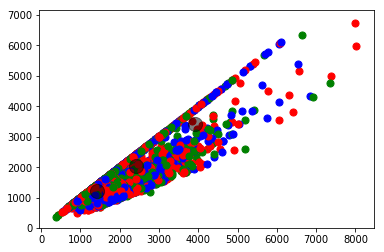

In [ ]:
xm = [12, 18, 17]
ym = [13, 13, 19]

#print(ym[2])
import itertools

colors = itertools.cycle(["r", "b", "g"])

a = []
b = []
mem = []
for i in range(len(center)):
        for j in range(len(member[i])):
            mem = data[member[i][j]]
            a = mem[:][0]
            b = mem[:][1]
            plt.scatter(a, b, c=next(colors), s=50, cmap='viridis')
#print(mem)
#plot_data[0].append(1)
#print(plot_data)

#p_data = [[]] * len(center)
#a = member[0]
#print(a)
#plt.scatter(a[:, 0], a[:, 1], ym, c="red", s=50)

#plt.scatter(xm, ym, c="red", s=50, cmap='viridis')
#print (center)
x = []
y = []
for i in range(len(center)):
    x.append(center[i][0])
    y.append(center[i][1])

plt.scatter(x, y, c='black', s=200, alpha=0.5);

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
    
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
    print(cluster_labels)
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    #print("For no of clusters =", n_clusters, 
          #" The average silhouette_score is :", silhouette_avg) 